<a href="https://colab.research.google.com/github/markfortma/Fa23ICS352_FPMachineLearning/blob/main/ICS352UsedCarPriceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
!wget https://raw.githubusercontent.com/markfortma/Fa23ICS352_FPMachineLearning/main/used_cars.csv

--2023-10-25 00:13:37--  https://raw.githubusercontent.com/markfortma/Fa23ICS352_FPMachineLearning/main/used_cars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607822 (594K) [text/plain]
Saving to: ‘used_cars.csv’

used_cars.csv       100%[===================>] 593.58K  --.-KB/s    in 0.06s   

2023-10-25 00:13:37 (10.3 MB/s) - ‘used_cars.csv’ saved [607822/607822]



In [3]:
df = pd.read_csv('used_cars.csv')

df_copy = df.copy()

display(df)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [4]:
#Find null/missing values in dataset
null_values = df.isnull()

missing_data_count = null_values.sum()

print(missing_data_count)

#df.info()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


In [5]:
df['accident'].value_counts()

None reported                             2910
At least 1 accident or damage reported     986
Name: accident, dtype: int64

In [6]:
df['fuel_type'].value_counts()

Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: fuel_type, dtype: int64

In [7]:
#Create a testing and training dataset
test_size = 0.2

import re

# Strip non-numeric tokens and convert to int
df['odometer'] = [int(re.sub('[^\d]', '', row)) for row in df['milage']]
df['sale_price'] = [int(re.sub('[^\d]', '', row)) for row in df['price']]

#make the engine column more concise
df['HP'] = df['engine'].str.extract(r'(\d+\.\d+)HP')
df['liters'] = df['engine'].str.extract(r'(\d+\.\d+)L')
df['engine_type'] = df['engine'].str.extract(r'(Electric Motor|Cylinder Engine)')

df['engine'] = df.apply(lambda row: f"{row['HP']}HP {row['liters']}L {row['engine_type']}", axis=1)

#Create a training and testing dataset using train_test_split(), test_size will be 20% of total data, random_state=10 makes sure that the gathered data will be reproduceable (not random each time you run it).
train_df, test_df = train_test_split(df, test_size=test_size, random_state=10)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

display(test_df)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,odometer,sale_price,HP,liters,engine_type
0,Nissan,370Z Touring,2009,"133,409 mi.",Gasoline,332.0HP 3.7L Cylinder Engine,6-Speed M/T,Silver,Gray,At least 1 accident or damage reported,Yes,"$14,999",133409,14999,332.0,3.7,Cylinder Engine
1,Rivian,R1S Adventure Package,2023,655 mi.,NaN,835.0HP nanL Electric Motor,1-Speed A/T,Red,Silver,None reported,Yes,"$94,500",655,94500,835.0,NaN,Electric Motor
2,Honda,Odyssey EX-L,2007,"170,000 mi.",Gasoline,244.0HP 3.5L Cylinder Engine,A/T,Black,Beige,None reported,Yes,"$7,700",170000,7700,244.0,3.5,Cylinder Engine
3,Tesla,Model Y Long Range,2022,500 mi.,NaN,425.0HP nanL Electric Motor,A/T,White,Black,None reported,Yes,"$45,900",500,45900,425.0,NaN,Electric Motor
4,Ford,Mustang Mach-E Select,2021,"18,000 mi.",NaN,266.0HP nanL Electric Motor,A/T,Blue,Black,None reported,Yes,"$39,499",18000,39499,266.0,NaN,Electric Motor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Cadillac,ATS 3.6L Luxury,2016,"25,000 mi.",Gasoline,335.0HP 3.6L Cylinder Engine,8-Speed A/T,Red,Beige,None reported,Yes,"$17,999",25000,17999,335.0,3.6,Cylinder Engine
798,MINI,Convertible John Cooper Works,2017,"24,280 mi.",Gasoline,228.0HP 2.0L Cylinder Engine,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$29,000",24280,29000,228.0,2.0,Cylinder Engine
799,GMC,Sierra 1500 SLT,2021,"23,400 mi.",Gasoline,420.0HP 6.2L Cylinder Engine,A/T,Black,Black,None reported,Yes,"$52,000",23400,52000,420.0,6.2,Cylinder Engine
800,Mercedes-Benz,SL-Class SL 63 AMG,2011,"47,400 mi.",Gasoline,518.0HP 6.3L Cylinder Engine,7-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,"$41,000",47400,41000,518.0,6.3,Cylinder Engine


In [8]:
#Missing values in testing data set

test_null_values = test_df.isnull()

test_missing_data_count = test_null_values.sum()

print(test_missing_data_count)

#Looks like there's lots of missing data in the HP, liters, and engine_type columns. Might be fine though.

brand             0
model             0
model_year        0
milage            0
fuel_type        30
engine            0
transmission      0
ext_col           0
int_col           0
accident         15
clean_title     107
price             0
odometer          0
sale_price        0
HP              165
liters           76
engine_type     162
dtype: int64


In [9]:
#Replaces null values in accident column as none reported, encodes column so that 1+ accidents is stored as 1, none or null is stored as 0

test_df['accident'] = test_df['accident'].map({'At least 1 accident or damage reported': 1, 'None reported': 0, None: 0})

In [10]:
test_df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,odometer,sale_price,HP,liters,engine_type
0,Nissan,370Z Touring,2009,"133,409 mi.",Gasoline,332.0HP 3.7L Cylinder Engine,6-Speed M/T,Silver,Gray,1.0,Yes,"$14,999",133409,14999,332.0,3.7,Cylinder Engine
1,Rivian,R1S Adventure Package,2023,655 mi.,NaN,835.0HP nanL Electric Motor,1-Speed A/T,Red,Silver,0.0,Yes,"$94,500",655,94500,835.0,NaN,Electric Motor
2,Honda,Odyssey EX-L,2007,"170,000 mi.",Gasoline,244.0HP 3.5L Cylinder Engine,A/T,Black,Beige,0.0,Yes,"$7,700",170000,7700,244.0,3.5,Cylinder Engine
3,Tesla,Model Y Long Range,2022,500 mi.,NaN,425.0HP nanL Electric Motor,A/T,White,Black,0.0,Yes,"$45,900",500,45900,425.0,NaN,Electric Motor
4,Ford,Mustang Mach-E Select,2021,"18,000 mi.",NaN,266.0HP nanL Electric Motor,A/T,Blue,Black,0.0,Yes,"$39,499",18000,39499,266.0,NaN,Electric Motor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Cadillac,ATS 3.6L Luxury,2016,"25,000 mi.",Gasoline,335.0HP 3.6L Cylinder Engine,8-Speed A/T,Red,Beige,0.0,Yes,"$17,999",25000,17999,335.0,3.6,Cylinder Engine
798,MINI,Convertible John Cooper Works,2017,"24,280 mi.",Gasoline,228.0HP 2.0L Cylinder Engine,6-Speed A/T,Black,Black,1.0,Yes,"$29,000",24280,29000,228.0,2.0,Cylinder Engine
799,GMC,Sierra 1500 SLT,2021,"23,400 mi.",Gasoline,420.0HP 6.2L Cylinder Engine,A/T,Black,Black,0.0,Yes,"$52,000",23400,52000,420.0,6.2,Cylinder Engine
800,Mercedes-Benz,SL-Class SL 63 AMG,2011,"47,400 mi.",Gasoline,518.0HP 6.3L Cylinder Engine,7-Speed A/T,White,Black,1.0,Yes,"$41,000",47400,41000,518.0,6.3,Cylinder Engine


In [11]:
for index, fuel_type in enumerate(test_df['fuel_type']):
    if not pd.isna(fuel_type):  #to check if 'fuel_type' is not missing
        fuel_type = fuel_type.lower()
        if 'hybrid' in fuel_type:
            test_df.at[index, 'fuel_type'] = 'Hybrid'
        elif 'gasoline' in fuel_type:
            test_df.at[index, 'fuel_type'] = 'Gasoline'
        elif 'diesel' in fuel_type:
            test_df.at[index, 'fuel_type'] = 'Diesel'
        elif 'e85 flex fuel' in fuel_type:
            test_df.at[index, 'fuel_type'] = 'E85 Flex Fuel'
        else:
            test_df.at[index, 'fuel_type'] = 'Other'
    else:
        test_df.at[index, 'fuel_type'] = 'Other'

In [12]:
display(test_df)

test_df['fuel_type'].value_counts()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,odometer,sale_price,HP,liters,engine_type
0,Nissan,370Z Touring,2009,"133,409 mi.",Gasoline,332.0HP 3.7L Cylinder Engine,6-Speed M/T,Silver,Gray,1.0,Yes,"$14,999",133409,14999,332.0,3.7,Cylinder Engine
1,Rivian,R1S Adventure Package,2023,655 mi.,Other,835.0HP nanL Electric Motor,1-Speed A/T,Red,Silver,0.0,Yes,"$94,500",655,94500,835.0,NaN,Electric Motor
2,Honda,Odyssey EX-L,2007,"170,000 mi.",Gasoline,244.0HP 3.5L Cylinder Engine,A/T,Black,Beige,0.0,Yes,"$7,700",170000,7700,244.0,3.5,Cylinder Engine
3,Tesla,Model Y Long Range,2022,500 mi.,Other,425.0HP nanL Electric Motor,A/T,White,Black,0.0,Yes,"$45,900",500,45900,425.0,NaN,Electric Motor
4,Ford,Mustang Mach-E Select,2021,"18,000 mi.",Other,266.0HP nanL Electric Motor,A/T,Blue,Black,0.0,Yes,"$39,499",18000,39499,266.0,NaN,Electric Motor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Cadillac,ATS 3.6L Luxury,2016,"25,000 mi.",Gasoline,335.0HP 3.6L Cylinder Engine,8-Speed A/T,Red,Beige,0.0,Yes,"$17,999",25000,17999,335.0,3.6,Cylinder Engine
798,MINI,Convertible John Cooper Works,2017,"24,280 mi.",Gasoline,228.0HP 2.0L Cylinder Engine,6-Speed A/T,Black,Black,1.0,Yes,"$29,000",24280,29000,228.0,2.0,Cylinder Engine
799,GMC,Sierra 1500 SLT,2021,"23,400 mi.",Gasoline,420.0HP 6.2L Cylinder Engine,A/T,Black,Black,0.0,Yes,"$52,000",23400,52000,420.0,6.2,Cylinder Engine
800,Mercedes-Benz,SL-Class SL 63 AMG,2011,"47,400 mi.",Gasoline,518.0HP 6.3L Cylinder Engine,7-Speed A/T,White,Black,1.0,Yes,"$41,000",47400,41000,518.0,6.3,Cylinder Engine


Gasoline         659
Hybrid            47
Other             40
Diesel            30
E85 Flex Fuel     26
Name: fuel_type, dtype: int64

Text(0.5, 1.0, 'Average Price by Brand')

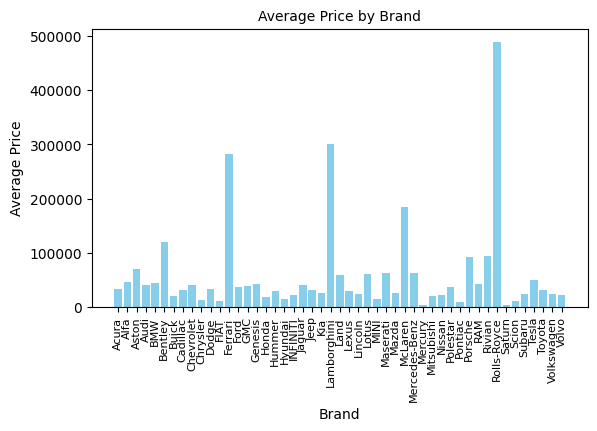

In [13]:

brand_avg_price = test_df.groupby('brand')['sale_price'].mean().reset_index()
plt.bar(brand_avg_price['brand'], brand_avg_price['sale_price'], color='skyblue', width = 0.8)
plt.xticks(rotation=90)
plt.xticks(fontsize =8)
plt.subplots_adjust(bottom=0.3)
plt.xlabel('Brand', fontsize=10)
plt.ylabel('Average Price', fontsize=10)
plt.title('Average Price by Brand', fontsize=10)

In [14]:
#Code to retrieve all unique external colors from the testing dataset

external_colors = test_df['ext_col']

print(external_colors.unique())
#print(sorted(external_colors.unique()))

['Silver' 'Red' 'Black' 'White' 'Blue' 'Gold' 'Mythos Black Metallic'
 'Gray' 'Pacific Blue Metallic' 'Satin Steel Metallic'
 'Santorini Black Metallic' 'Magnetic Metallic' 'Dark Slate Metallic'
 'Yellow' 'Deep Crystal Blue Mica' 'Orange' 'Black Obsidian'
 'Magnetic Gray Clearcoat' 'Brown' 'Nightfall Gray Metallic'
 'Velvet Red Pearlcoat' 'Snow White Pearl' 'Green' 'Beige'
 'Firecracker Red Clearcoat' 'Eiger Grey' 'China Blue' 'Beluga Black'
 'Titanium Silver' 'Jet Black Mica' 'Magnetic Black' 'Silver Ice Metallic'
 'Go Mango!' 'Gun Metallic' 'Bright White Clearcoat' 'Glacier White'
 'Snowflake White Pearl' 'Graphite Grey' 'Tan' 'Moonlight Cloud'
 'Caspian Blue' 'Summit White' 'Super White' 'Ametrin Metallic'
 'Portofino Blue Metallic' 'Purple' 'Platinum White Pearl' 'Pacific Blue'
 'Firenze Red Metallic' 'Mountain Air Metallic' 'Daytona Gray'
 'Fuji White' 'Glacier Silver Metallic' 'Hyper Red' 'Blu' 'Yulong'
 'Midnight Black' 'Firenze Red' 'Pristine White' 'Phytonic Blue Metallic'
 'P

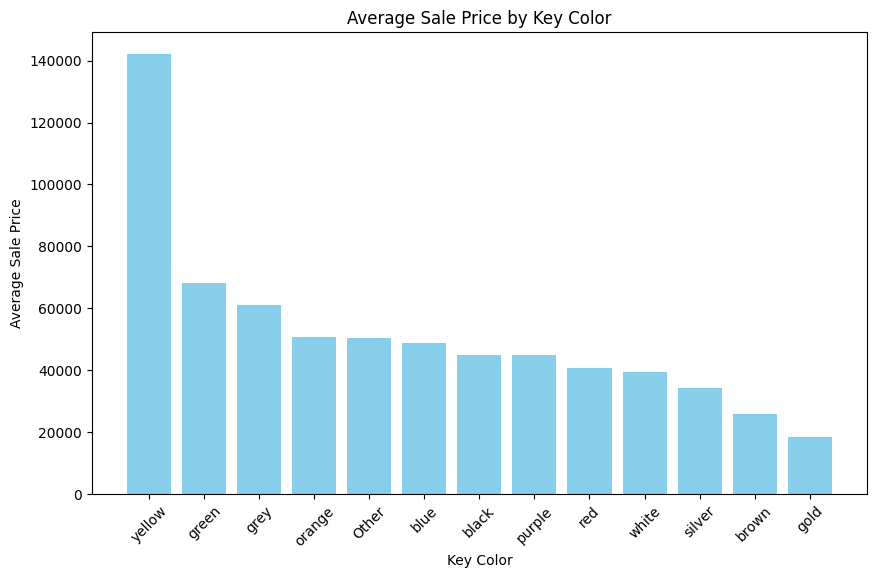

In [15]:
#Color categories to match up to
key_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'white', 'black', 'grey', 'brown', 'gold', 'silver']

#Function to categorize external color names under general colors. i.e. Navarra Blue will fall under blue
def categorize_color(ext_color):
    for color in key_colors:
        if re.search(color, ext_color, re.IGNORECASE):
            return color
    return 'Other'  #If no match found just categorize as 'Other'

#Apply the categorization function to create a new column
test_df['key_color'] = test_df['ext_col'].apply(categorize_color)

#Calculates the average sale price for each key color
avg_price_by_color = test_df.groupby('key_color')['sale_price'].mean().sort_values(ascending=False)

#Create a bar chart with the data
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_color.index, avg_price_by_color.values, color='skyblue')
plt.xlabel('Key Color')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Key Color')
plt.xticks(rotation=45)
plt.show()


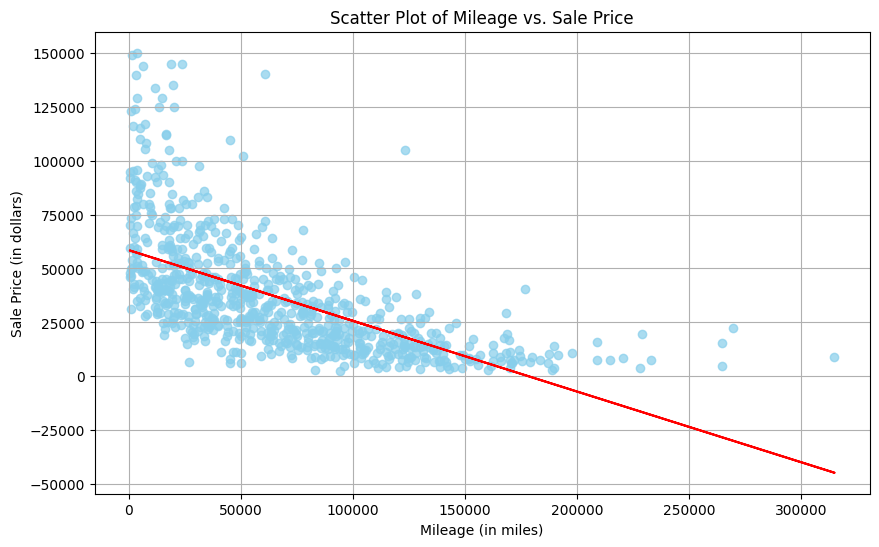

In [16]:
mileage = test_df['odometer']
sale_price = test_df['sale_price']

#Calculate the mean and standard deviation of sale prices
mean_price = np.mean(sale_price)
std_price = np.std(sale_price)

#Find the price threshold to remove outliers for this graph by finding points > 2 standard deviations away from the mean
price_threshold = mean_price + (2*std_price)

#Filter out outliers
filtered_price = sale_price[sale_price < price_threshold]
filtered_mileage = mileage[sale_price < price_threshold]

fit = np.polyfit(filtered_mileage, filtered_price, 1)
fit_fn = np.poly1d(fit)

#Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_mileage, filtered_price, color='skyblue', alpha=0.7)

#Tried to create a line of best fit, but doesn't work very well. Need to figure out how to keep the regression line from going beneath y=0
plt.plot(filtered_mileage, fit_fn(filtered_mileage), color='red', label='Line of Best Fit')


plt.xlabel('Mileage (in miles)')
plt.ylabel('Sale Price (in dollars)')
plt.title('Scatter Plot of Mileage vs. Sale Price')
plt.grid(True)

plt.show()

    model_year    sale_price
0         1993   5433.000000
1         1994   6000.000000
2         1996   7500.000000
3         1997  11333.333333
4         1998  11995.000000
5         1999  12450.000000
6         2000  19433.333333
7         2001   7400.000000
8         2002  26123.500000
9         2003   5609.800000
10        2004  13949.928571
11        2005  34449.400000
12        2006  21459.466667
13        2007  17158.000000
14        2008  17756.681818
15        2009  25846.947368
16        2010  28289.250000
17        2011  17023.476190
18        2012  19758.200000
19        2013  36010.153846
20        2014  21899.567568
21        2015  37021.870370
22        2016  40114.150943
23        2017  34837.367347
24        2018  43231.982759
25        2019  45936.932203
26        2020  65962.823529
27        2021  79794.875000
28        2022  61541.796875
29        2023  84809.291667
30        2024  52991.000000


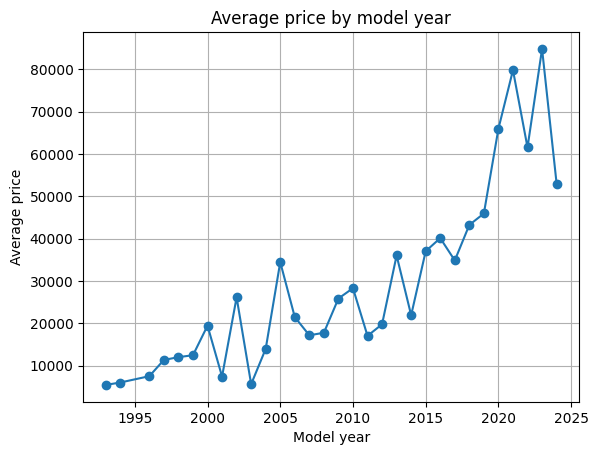

In [17]:
avg_price_by_year = test_df.groupby('model_year')['sale_price'].mean().reset_index()
print(avg_price_by_year)





plt.plot(avg_price_by_year['model_year'], avg_price_by_year['sale_price'], marker='o', linestyle='-')
plt.xlabel('Model year')
plt.ylabel('Average price')
plt.title('Average price by model year')
plt.grid(True)
plt.show()